In [1]:
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.models import Sequential, model_from_json
from keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier

Using Theano backend.


In [28]:
import math

from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
from python_speech_features import fbank, logfbank

from scipy.ndimage.interpolation import shift
from scipy.signal import spectrogram

from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler

import soundfile

import os, sys
sys.path.append(os.path.dirname(os.path.abspath('')))


from  music_transcription.onset_detection import metrics
from  music_transcription.onset_detection import read_data

# Spectrogram tests

In [29]:
local_path = r"data\IDMT-SMT-GUITAR_V2\dataset2\audio\AR_Lick10_KN.wav"
abs_path = os.path.join(os.path.dirname(os.path.abspath('')), local_path)
print(abs_path)
samples, sample_rate = soundfile.read(abs_path)
print(samples.shape)
print(sample_rate)

D:\Github data\music-transcription-1\data\IDMT-SMT-GUITAR_V2\dataset2\audio\AR_Lick10_KN.wav
(706816,)
44100


(129,)
(3155,)
(129, 3155)


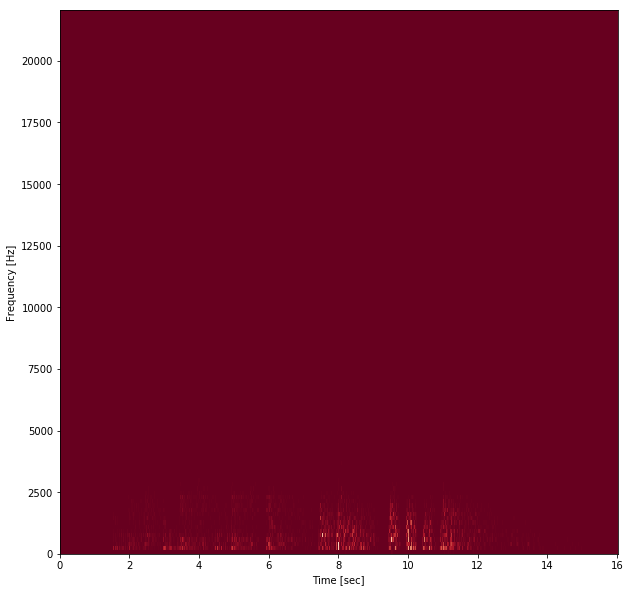

In [30]:
f, t, Sxx = spectrogram(np.absolute(samples), sample_rate)
print(f.shape)
print(t.shape)
print(Sxx.shape)
plt.figure(figsize=(10,10))
plt.pcolormesh(t, f, Sxx, cmap='RdBu')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

(129,)
[     0.          172.265625    344.53125     516.796875    689.0625
    861.328125   1033.59375    1205.859375   1378.125      1550.390625
   1722.65625    1894.921875   2067.1875     2239.453125   2411.71875
   2583.984375   2756.25       2928.515625   3100.78125    3273.046875
   3445.3125     3617.578125   3789.84375    3962.109375   4134.375
   4306.640625   4478.90625    4651.171875   4823.4375     4995.703125
   5167.96875    5340.234375   5512.5        5684.765625   5857.03125
   6029.296875   6201.5625     6373.828125   6546.09375    6718.359375
   6890.625      7062.890625   7235.15625    7407.421875   7579.6875
   7751.953125   7924.21875    8096.484375   8268.75       8441.015625
   8613.28125    8785.546875   8957.8125     9130.078125   9302.34375
   9474.609375   9646.875      9819.140625   9991.40625   10163.671875
  10335.9375    10508.203125  10680.46875   10852.734375  11025.
  11197.265625  11369.53125   11541.796875  11714.0625    11886.328125
  12058.59375  

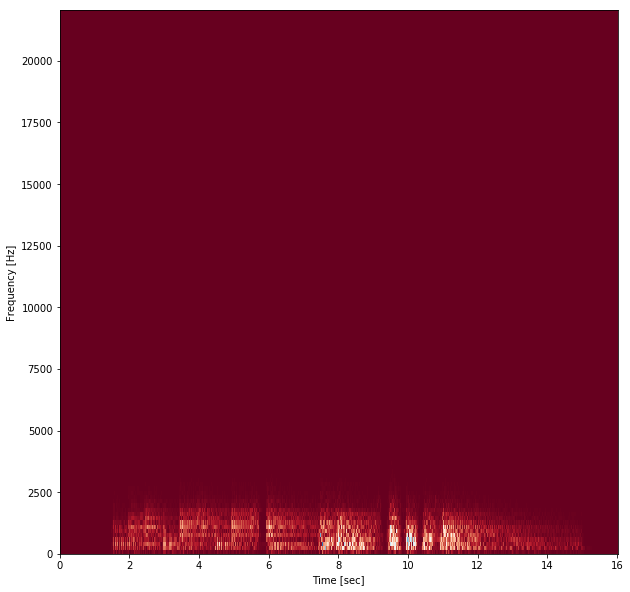

In [31]:
f, t, Sxx = spectrogram(samples, sample_rate, mode='magnitude')
print(f.shape)
print(f)
print(t.shape)
print(t)
print(Sxx.shape)
plt.figure(figsize=(10,10))
plt.pcolormesh(t, f, Sxx, cmap='RdBu')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

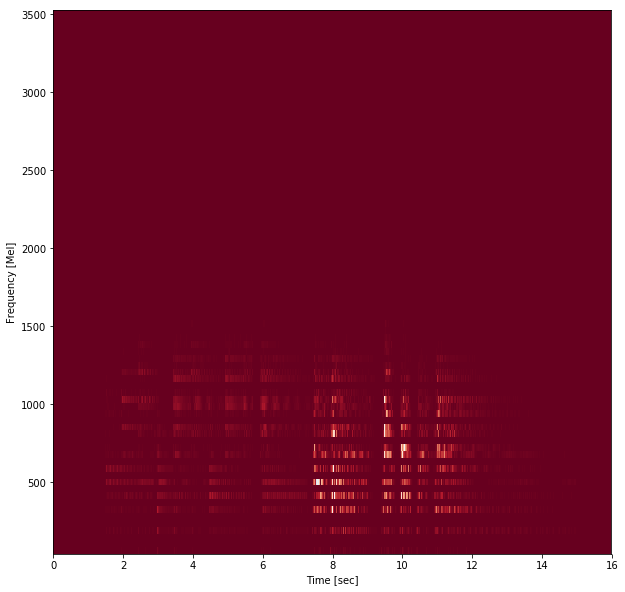

In [32]:
def to_mel(freq):
    return 1125 * math.log(1 + freq/700)

winlen = 0.046
winstep = 0.01
lowfreq = 27.5
highfreq = 16000
# features, _ = fbank(samples, sample_rate, nfilt=80)
features, _ = fbank(samples, sample_rate, winlen=winlen, winstep=winstep, nfilt=80, lowfreq=lowfreq, highfreq=highfreq, preemph=0)
# features = logfbank(samples, sample_rate, winstep=winstep, nfilt=80, lowfreq=lowfreq, highfreq=highfreq, preemph=0)
t_len, f_len = features.shape
mel_lowfreq = to_mel(lowfreq)
mel_highfreq = to_mel(highfreq)
f = np.arange(mel_lowfreq, mel_highfreq, (mel_highfreq - mel_lowfreq)/f_len)
t = np.arange(0.0, t_len*winstep, winstep)

plt.figure(figsize=(10,10))
plt.pcolormesh(t, f, features.T, cmap='RdBu')
plt.ylabel('Frequency [Mel]')
plt.xlabel('Time [sec]')

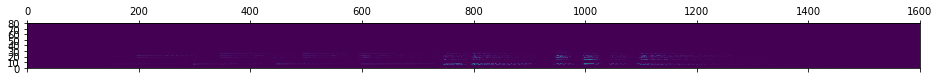

In [33]:
plt.matshow(features.T, origin='lower')

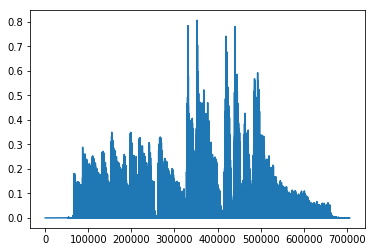

In [34]:
plt.plot(np.absolute(samples))

In [37]:
local_path = r'data\IDMT-SMT-GUITAR_V2\dataset2\audio\LP_Lick8_KN.wav'
abs_path = os.path.join(os.path.dirname(os.path.abspath('')), local_path)
print(abs_path)
samples, sample_rate = soundfile.read(abs_path)
print(samples.shape)
print(sample_rate)


D:\Github data\music-transcription-1\data\IDMT-SMT-GUITAR_V2\dataset2\audio\LP_Lick8_KN.wav
(657232,)
44100


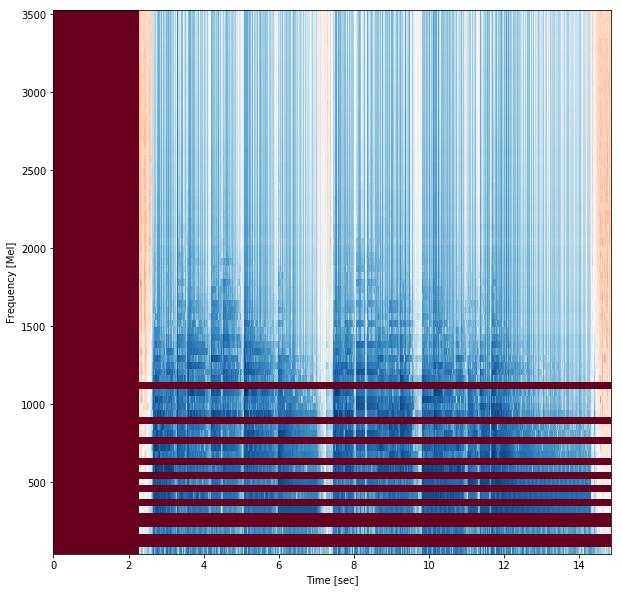

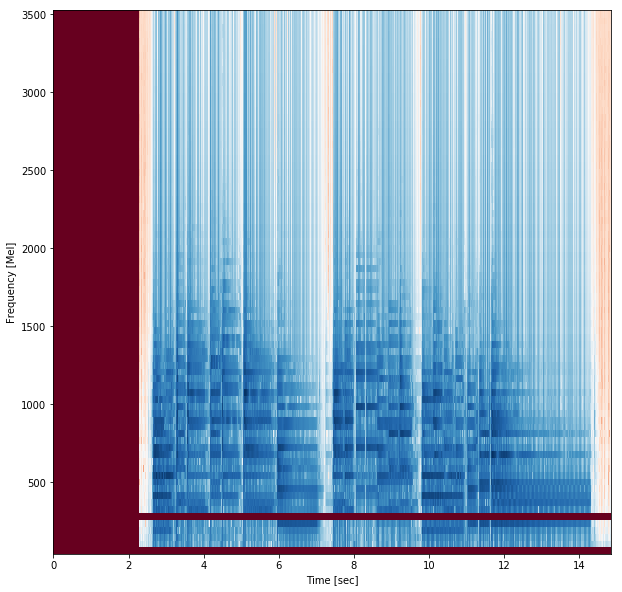

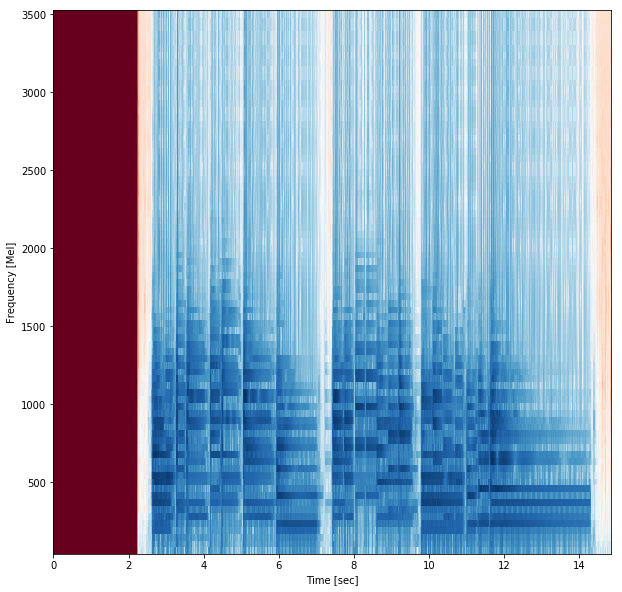

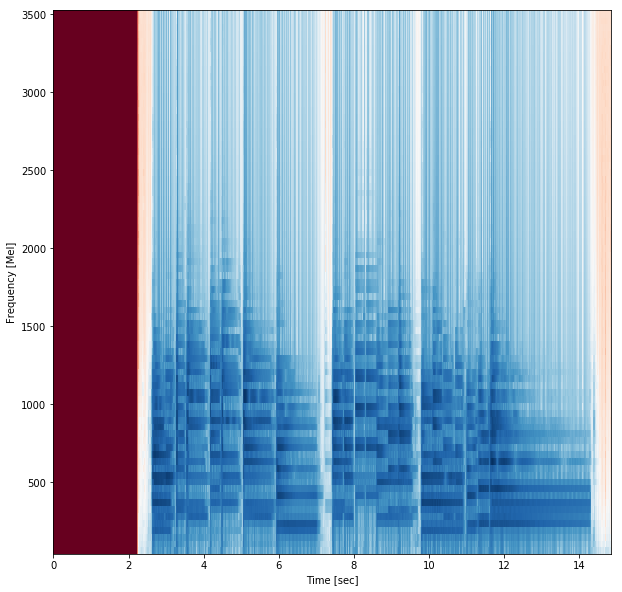

In [38]:
def to_mel(freq):
    return 1125 * math.log(1 + freq/700)

winlen = 0.046
winstep = 0.01
lowfreq = 27.5
highfreq = 16000

for nfft in [512, 1024, 2048, 4096]:
    # features, _ = fbank(samples, sample_rate, nfilt=80)
    # features, _ = fbank(samples, sample_rate, winlen=winlen, winstep=winstep, nfilt=80, nfft=nfft, lowfreq=lowfreq, highfreq=highfreq, preemph=0)
    features = logfbank(samples, sample_rate, winlen=winlen, winstep=winstep, nfilt=80, nfft=nfft, lowfreq=lowfreq, highfreq=highfreq, preemph=0)
    t_len, f_len = features.shape
    mel_lowfreq = to_mel(lowfreq)
    mel_highfreq = to_mel(highfreq)
    f = np.arange(mel_lowfreq, mel_highfreq, (mel_highfreq - mel_lowfreq)/f_len)
    t = np.arange(0.0, t_len*winstep, winstep)

    plt.figure(figsize=(10,10))
    plt.pcolormesh(t, f, features.T, cmap='RdBu')
    plt.ylabel('Frequency [Mel]')
    plt.xlabel('Time [sec]')

In [39]:
for j in range(features.shape[1]):
    print(str(j) + ' ' + str(features[:, j].mean()))

0 -11.2188337029
1 -10.9850272923
2 -10.4841507891
3 -9.66966124774
4 -8.63895936061
5 -8.6591635988
6 -8.62819376106
7 -8.14101357117
8 -8.89202632153
9 -8.83015920213
10 -8.60745211402
11 -8.80541787489
12 -9.25426248293
13 -8.63476708869
14 -9.06820649195
15 -9.15862679045
16 -9.12826161675
17 -9.4970715711
18 -9.00044533342
19 -8.79016368269
20 -9.60958893801
21 -9.90201113304
22 -9.73018654313
23 -9.66917048299
24 -10.4977234071
25 -10.1264879856
26 -10.3586155099
27 -10.8936819285
28 -11.1151998007
29 -11.5921479338
30 -11.6055720797
31 -12.2804805749
32 -12.359335537
33 -12.3331916504
34 -12.8853163305
35 -12.8092211714
36 -13.2488607974
37 -13.4365823235
38 -13.4370095082
39 -13.574204648
40 -13.7797992228
41 -13.8427029293
42 -14.02795987
43 -14.0624628711
44 -14.2018018995
45 -14.2534578807
46 -14.3612782875
47 -14.4466272983
48 -14.5145375273
49 -14.5674322665
50 -14.6212614408
51 -14.6812427295
52 -14.7226797735
53 -14.7835524407
54 -14.8277874202
55 -14.8682420709
56 -14.9

In [40]:
for j in range(features.shape[1]):
    print(str(j) + ' ' + str(features[:, j].mean()))

0 -11.2188337029
1 -10.9850272923
2 -10.4841507891
3 -9.66966124774
4 -8.63895936061
5 -8.6591635988
6 -8.62819376106
7 -8.14101357117
8 -8.89202632153
9 -8.83015920213
10 -8.60745211402
11 -8.80541787489
12 -9.25426248293
13 -8.63476708869
14 -9.06820649195
15 -9.15862679045
16 -9.12826161675
17 -9.4970715711
18 -9.00044533342
19 -8.79016368269
20 -9.60958893801
21 -9.90201113304
22 -9.73018654313
23 -9.66917048299
24 -10.4977234071
25 -10.1264879856
26 -10.3586155099
27 -10.8936819285
28 -11.1151998007
29 -11.5921479338
30 -11.6055720797
31 -12.2804805749
32 -12.359335537
33 -12.3331916504
34 -12.8853163305
35 -12.8092211714
36 -13.2488607974
37 -13.4365823235
38 -13.4370095082
39 -13.574204648
40 -13.7797992228
41 -13.8427029293
42 -14.02795987
43 -14.0624628711
44 -14.2018018995
45 -14.2534578807
46 -14.3612782875
47 -14.4466272983
48 -14.5145375273
49 -14.5674322665
50 -14.6212614408
51 -14.6812427295
52 -14.7226797735
53 -14.7835524407
54 -14.8277874202
55 -14.8682420709
56 -14.9

# 2D ConvNet

In [41]:
def transform_X(X_part, n_frames, frame_rate_hz, sample_rate, log_transform_magnitudes=True,
                winlen=0.046, nfilt=80, nfft=2048,
                lowfreq=27.5, highfreq=16000, preemph=0):
    """Last (winlen - winstep) seconds will be cut off"""
    
    winstep = 1 / frame_rate_hz
    samples = X_part.ravel()
    if log_transform_magnitudes:
        filterbank = logfbank(samples, sample_rate, winlen=winlen, winstep=winstep, nfilt=nfilt,
                              nfft=nfft, lowfreq=lowfreq, highfreq=highfreq, preemph=preemph)
    else:
        filterbank, _ = fbank(samples, sample_rate, winlen=winlen, winstep=winstep, nfilt=nfilt,
                              nfft=nfft, lowfreq=lowfreq, highfreq=highfreq, preemph=preemph)
    
    if n_frames is None:
        n_frames = filterbank.shape[0]
    return filterbank[:n_frames, :], n_frames

def transform_labels(y_part, y_actual_onset_only_part, ds_label, n_frames):
    ds_labels_part = np.empty(n_frames, dtype=np.int8)
    ds_labels_part.fill(ds_label)
    return y_part[:n_frames], y_actual_onset_only_part[:n_frames], ds_labels_part

def transform_all(X_parts, y_parts, y_actual_onset_only_parts, ds_labels, frame_rate_hz, sample_rate):
    n_frames_list = [None] * len(X_parts)
    X_channels = []
    # Create 3 channels with different window length.
    # Make sure to run the largest window first which cuts off the most at the end of the file.
    # Return and reuse the number of frames for each part = each file for the other nfft values.
    for winlen, nfft in sorted(
        # [(0.023, 1024), (0.046, 2048), (0.092, 4096)],
        [(0.046, 2048)],
        
        key=lambda t: t[1], reverse=True
    ):
        transformed = [transform_X(X_part, n_frames, frame_rate_hz, sample_rate, winlen=winlen, nfft=nfft)
                       for X_part, n_frames
                       in zip(X_parts, n_frames_list)]
        X = np.concatenate([t[0] for t in transformed])
        n_frames_list = [t[1] for t in transformed]
        X_channels.append(X)
    
    transformed = [transform_labels(y_part, y_actual_onset_only_part, ds_label, n_frames)
                   for y_part, y_actual_onset_only_part, ds_label, n_frames
                   in zip(y_parts, y_actual_onset_only_parts, ds_labels, n_frames_list)]
    y = np.concatenate([t[0] for t in transformed])
    y_actual_onset_only = np.concatenate([t[1] for t in transformed])
    ds_labels_flat = np.concatenate([t[2] for t in transformed])
    
    return X_channels, y, y_actual_onset_only, ds_labels_flat

def get_X_with_context_frames(X, c=7, border_value=0.0):
    """Return new X with new dimensions (X.shape[0] = n_samples, 2*c + 1, X.shape[1] = filterbank_size)
    
    One entry of X_new consists of c frames of context before the current frame,
    the current frame and another c frames of context after the current frame.
    """
    
    n_samples = X.shape[0]
    filterbank_size = X.shape[1]
    X_new = np.empty((n_samples, 2*c + 1, filterbank_size))
    for i in range(n_samples):
        for offset in range(-c, c + 1):
            if i + offset > -1 and i + offset < n_samples:
                # X_new 2nd dim: [0, 2*c + 1[
                # X 1st dim: [i-c, i+c+1[
                X_new[i, offset + c, :] = X[i + offset, :]
            else:
                X_new[i, offset + c].fill(border_value)
    return X_new

def create_model(input_shape):
    model = Sequential()
    
    model.add(Conv2D(10, (7, 3), padding='valid', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(1, 3)))
    model.add(Conv2D(20, (3, 3), padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(1, 3)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

def prepare_data(
    X_parts_train, y_parts_train, y_actual_onset_only_parts_train, ds_labels_train,
    X_parts_test, y_parts_test, y_actual_onset_only_parts_test, ds_labels_test,
    frame_rate_hz, sample_rate
):
    print('Creating spectrograms')
    X_channels_train, y_train, y_actual_onset_only_train, ds_labels_flat_train = transform_all(
        X_parts_train, y_parts_train, y_actual_onset_only_parts_train, ds_labels_train, frame_rate_hz, sample_rate
    )
    X_channels_test, y_test, y_actual_onset_only_test, ds_labels_flat_test = transform_all(
        X_parts_test, y_parts_test, y_actual_onset_only_parts_test, ds_labels_test, frame_rate_hz, sample_rate
    )
    
    print('Spectrogram data infos:')
    for X_channels, y, y_actual_onset_only, ds_labels_flat in [
        (X_channels_train, y_train, y_actual_onset_only_train, ds_labels_flat_train),
        (X_channels_test, y_test, y_actual_onset_only_test, ds_labels_flat_test),
    ]:
        for X in X_channels:
            print(X.shape)
        print(y.shape)
        print(y.sum())
        print(y_actual_onset_only.shape)
        print(y_actual_onset_only.sum())
        print(ds_labels_flat.shape)
        print(ds_labels_flat.mean())
    for X_train, X_test in zip(X_channels_train, X_channels_test):
        print(X_train.shape)
        print(X_test.shape)
        print(X_train.mean())
        print(X_train.std())
        print(X_test.mean())
        print(X_test.std())
        print('')
    
    print('Standardizing (each band separately)')
    for X_train, X_test in zip(X_channels_train, X_channels_test):
        for j in range(X_train.shape[1]):
            ss = StandardScaler()
            X_train[:, j:j+1] = ss.fit_transform(X_train[:, j:j+1])
            X_test[:, j:j+1] = ss.transform(X_test[:, j:j+1])
    
    print('Data after standardizing:')
    for X_train, X_test in zip(X_channels_train, X_channels_test):
        print(X_train.shape)
        print(X_test.shape)
        print(X_train.mean())
        print(X_train.std())
        print(X_test.mean())
        print(X_test.std())
        print('')
    for i in range(len(X_channels_train)):
        X_channels_train[i] = get_X_with_context_frames(X_channels_train[i])
        X_channels_test[i] = get_X_with_context_frames(X_channels_test[i])
        print(X_channels_train[i].shape)
        print(X_channels_test[i].shape)
    
    print('Reshaping data')
    img_rows, img_cols = (X_channels_train[0].shape[1], X_channels_train[0].shape[2])
    for i in range(len(X_channels_train)):
        # Theano is 3 times faster with channels_first vs. channels_last on MNIST, so this setting matters.
        # "image_data_format": "channels_first" @ %USERPROFILE%/.keras/keras.json
        if K.image_data_format() == 'channels_first':
            X_channels_train[i] = X_channels_train[i].reshape(X_channels_train[i].shape[0], 1, img_rows, img_cols)
            X_channels_test[i] = X_channels_test[i].reshape(X_channels_test[i].shape[0], 1, img_rows, img_cols)
        else:
            X_channels_train[i] = X_channels_train[i].reshape(X_channels_train[i].shape[0], img_rows, img_cols, 1)
            X_channels_test[i] = X_channels_test[i].reshape(X_channels_test[i].shape[0], img_rows, img_cols, 1)
        print(X_channels_train[i].shape)
        print(X_channels_test[i].shape)

    if K.image_data_format() == 'channels_first':
        input_shape = (len(X_channels_train), img_rows, img_cols)
    else:
        input_shape = (img_rows, img_cols, len(X_channels_train))
    print(input_shape)
    
    print('Concatenating channels')
    X_train = np.concatenate(X_channels_train, axis=1)
    X_test = np.concatenate(X_channels_test, axis=1)
    print(X_train.shape)
    print(X_test.shape)
    
    return (X_train, y_train, y_actual_onset_only_train, ds_labels_flat_train,
            X_test, y_test, y_actual_onset_only_test, ds_labels_flat_test,
            input_shape)

def fit_predict(X_train, y_train, y_actual_onset_only_train, X_test, y_test, y_actual_onset_only_test, input_shape):
    clf = KerasClassifier(
        build_fn=create_model,
        batch_size=1024, epochs=500,
        validation_data=(X_test, y_test),
        callbacks=[EarlyStopping(monitor='loss', patience=5)],
        input_shape=input_shape
    )
    clf.fit(X_train, y_train, verbose=2)
    y_train_predicted = clf.predict(X_train).ravel()
    y_test_predicted = clf.predict(X_test).ravel()

    model = clf.model
    # for layer in model.layers:
        # print('layer config:')
        # print(layer.get_config())
        # print('input shape: ' + str(layer.input_shape))
        # print('output shape: ' + str(layer.output_shape))
    print('TRAIN')
    print(classification_report(y_train, y_train_predicted))
    print(onset_metric(y_train, y_actual_onset_only_train, y_train_predicted, n_tolerance_frames_plus_minus=2))
    print(onset_metric(y_train, y_actual_onset_only_train, y_train_predicted, n_tolerance_frames_plus_minus=5))
    print('TEST')
    print(classification_report(y_test, y_test_predicted))
    print(onset_metric(y_test, y_actual_onset_only_test, y_test_predicted, n_tolerance_frames_plus_minus=2))
    print(onset_metric(y_test, y_actual_onset_only_test, y_test_predicted, n_tolerance_frames_plus_minus=5))
    print('')
    
    return clf

In [42]:
# active_datasets = {1, 2, 3, 4}
# active_datasets = {2}
# active_datasets = {4}
active_datasets = {1, 2}
frame_rate_hz = 100
expected_sample_rate = 44100
subsampling_step = 1
X_parts, y_parts, y_actual_onset_only_parts, ds_labels = read_data(
    active_datasets, frame_rate_hz, expected_sample_rate, subsampling_step
)

TypeError: 'module' object is not callable

## Fit / predict

In [ ]:
X_parts_train, X_parts_test, y_parts_train, y_parts_test, y_actual_onset_only_parts_train, y_actual_onset_only_parts_test, ds_labels_train, ds_labels_test = train_test_split(
    X_parts, y_parts, y_actual_onset_only_parts, ds_labels, test_size=0.2, random_state=42
)
X_parts = None
y_parts = None
y_actual_onset_only_parts = None
ds_labels = None

(
    X_train, y_train, y_actual_onset_only_train, ds_labels_flat_train,
    X_test, y_test, y_actual_onset_only_test, ds_labels_flat_test,
    input_shape
) = prepare_data(
    X_parts_train, y_parts_train, y_actual_onset_only_parts_train, ds_labels_train,
    X_parts_test, y_parts_test, y_actual_onset_only_parts_test, ds_labels_test,
    frame_rate_hz, expected_sample_rate
)
X_parts_train = None
X_parts_test = None
y_parts_train = None
y_parts_test = None
y_actual_onset_only_parts_train = None
y_actual_onset_only_parts_test = None
ds_labels_train = None
ds_labels_test = None

clf = fit_predict(X_train, y_train, y_actual_onset_only_train, X_test, y_test, y_actual_onset_only_test, input_shape)

## CV on dataset 1 + 2

In [5]:
ds12 = [t for t
        in zip(X_parts, y_parts, y_actual_onset_only_parts, ds_labels) if t[3] == 1 or t[3] == 2]
# ds34 = [t for t
#         in zip(X_parts, y_parts, y_actual_onset_only_parts, ds_labels) if t[3] != 1 and t[3] != 2]
X_parts = None
y_parts = None
y_actual_onset_only_parts = None
ds_labels = None

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
clfs = []
for train_indices, test_indices in k_fold.split(ds12):
    X_parts_train = [t[0] for t in [ds12[i] for i in train_indices]]#  + [t[0] for t in ds34]
    y_parts_train = [t[1] for t in [ds12[i] for i in train_indices]]#  + [t[1] for t in ds34]
    y_actual_onset_only_parts_train = [t[2] for t in [ds12[i] for i in train_indices]]#  + [t[2] for t in ds34]
    ds_labels_train = [t[3] for t in [ds12[i] for i in train_indices]]#  + [t[3] for t in ds34]
    X_parts_test = [t[0] for t in [ds12[i] for i in test_indices]]
    y_parts_test = [t[1] for t in [ds12[i] for i in test_indices]]
    y_actual_onset_only_parts_test = [t[2] for t in [ds12[i] for i in test_indices]]
    ds_labels_test = [t[3] for t in [ds12[i] for i in test_indices]]
    
    (
        X_train, y_train, y_actual_onset_only_train, ds_labels_flat_train,
        X_test, y_test, y_actual_onset_only_test, ds_labels_flat_test,
        input_shape
    ) = prepare_data(
        X_parts_train, y_parts_train, y_actual_onset_only_parts_train, ds_labels_train,
        X_parts_test, y_parts_test, y_actual_onset_only_parts_test, ds_labels_test,
        frame_rate_hz, expected_sample_rate
    )
    X_parts_train = None
    X_parts_test = None
    y_parts_train = None
    y_parts_test = None
    y_actual_onset_only_parts_train = None
    y_actual_onset_only_parts_test = None
    ds_labels_train = None
    ds_labels_test = None

    clf = fit_predict(X_train, y_train, y_actual_onset_only_train, X_test, y_test, y_actual_onset_only_test, input_shape)
    clfs.append(clf)

Creating spectrograms
Spectrogram data infos:
(354959, 80)
(354959,)
10706
(354959,)
3803
(354959,)
1.78630207996
(86329, 80)
(86329,)
2159
(86329,)
775
(86329,)
1.76515423554
(354959, 80)
(86329, 80)
-12.4376983605
6.44601379577
-12.6196319939
6.65364390715

Standardizing (each band separately)
Data after standardizing:
(354959, 80)
(86329, 80)
-1.73592629135e-16
1.0
-0.0303297910017
1.03965938446

(354959, 15, 80)
(86329, 15, 80)
Reshaping data
(354959, 1, 15, 80)
(86329, 1, 15, 80)
(1, 15, 80)
Concatenating channels
(354959, 1, 15, 80)
(86329, 1, 15, 80)
Train on 354959 samples, validate on 86329 samples
Epoch 1/500
11s - loss: 0.0577 - acc: 0.9799 - val_loss: 0.0346 - val_acc: 0.9864
Epoch 2/500
10s - loss: 0.0366 - acc: 0.9851 - val_loss: 0.0315 - val_acc: 0.9876
Epoch 3/500
11s - loss: 0.0341 - acc: 0.9863 - val_loss: 0.0266 - val_acc: 0.9887
Epoch 4/500
11s - loss: 0.0318 - acc: 0.9870 - val_loss: 0.0251 - val_acc: 0.9891
Epoch 5/500
11s - loss: 0.0306 - acc: 0.9876 - val_loss: 

# Save / load

In [18]:
def save_model(model, path_to_json='model.json', path_to_weights='weights.hdf5'):
    with open(path_to_json, 'w') as f:
        f.write(model.to_json())
    model.save_weights(path_to_weights)

def load_model(path_to_json='model.json', path_to_weights='weights.hdf5'):
    with open(path_to_json) as f:
        model = model_from_json(f.read())
    model.load_weights(path_to_weights)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# currently impossible without custom mods: https://github.com/fchollet/keras/issues/4274
# def load_model_sklearn(path_to_json='model.json', path_to_weights='weights.hdf5'):
#     clf = KerasClassifier(
#         build_fn=load_model,
#         batch_size=1024, epochs=500,
#         path_to_json=path_to_json, path_to_weights=path_to_weights,
#     )
#     
#     return clf

In [19]:
save_model(model, path_to_json='models/20170423_1_channel_ds1-4.json', path_to_weights='models/20170423_1_channel_ds1-4.hdf5')

In [20]:
loaded_model = load_model(path_to_json='models/20170423_1_channel_ds1-4.json', path_to_weights='models/20170423_1_channel_ds1-4.hdf5')

In [21]:
print(loaded_model.evaluate(X_test, y_test, batch_size=1024))

230400/231210 [============================>.] - ETA: 0s[0.052954115933474773, 0.98060205009722867]


In [22]:
y_test_predicted = loaded_model.predict_classes(X_test, batch_size=1024).ravel()
print(classification_report(y_test, y_test_predicted))
print(onset_metric(y_test, y_actual_onset_only_test, y_test_predicted, n_tolerance_frames_plus_minus=2))
print(onset_metric(y_test, y_actual_onset_only_test, y_test_predicted, n_tolerance_frames_plus_minus=5))

230400/231210 [============================>.] - ETA: 0s             precision    recall  f1-score   support

          0       0.99      0.99      0.99    217041
          1       0.84      0.85      0.84     14169

avg / total       0.98      0.98      0.98    231210

TP=4730, FN=117, FP=530
precision=0.899239543726, recall=0.9758613575407469, F1=0.935984960918

TP=4760, FN=87, FP=143
precision=0.970834183153, recall=0.9820507530431195, F1=0.97641025641



# Find offset of onset detection labeling per dataset

In [22]:
for name, X, y, y_actual_onset_only in [
    ('ds1', X_ds1, y_ds1, y_actual_onset_only_ds1),
    ('ds2', X_ds2, y_ds2, y_actual_onset_only_ds2),
    ('ds3', X_ds3, y_ds3, y_actual_onset_only_ds3),
]:
    print(name)
    y_predicted = loaded_model.predict_classes(X, batch_size=1024).ravel()
    for shift_by in range(-5, 6):
        print(shift_by)
        y_shifted = shift(y, shift_by, cval=0)
        y_actual_onset_only_shifted = shift(y_actual_onset_only, shift_by, cval=0)
        print(classification_report(y_shifted, y_predicted))
        print(onset_metric(y_shifted, y_actual_onset_only_shifted, y_predicted, n_tolerance_frames_plus_minus=2))
        print(onset_metric(y_shifted, y_actual_onset_only_shifted, y_predicted, n_tolerance_frames_plus_minus=5))
    print('')

ds1
95232/96128 [============================>.] - ETA: 0s-5
             precision    recall  f1-score   support

          0       0.98      0.99      0.99     94123
          1       0.27      0.21      0.24      2005

avg / total       0.97      0.97      0.97     96128

TP=366, FN=423, FP=1096
precision=0.250341997264, recall=0.46387832699619774, F1=0.325188804976

TP=776, FN=13, FP=217
precision=0.781470292044, recall=0.9835234474017744, F1=0.870931537598

-4
             precision    recall  f1-score   support

          0       0.98      0.99      0.99     94123
          1       0.30      0.24      0.26      2005

avg / total       0.97      0.97      0.97     96128

TP=546, FN=243, FP=901
precision=0.377332411887, recall=0.6920152091254753, F1=0.488372093023

TP=780, FN=9, FP=53
precision=0.93637454982, recall=0.9885931558935361, F1=0.961775585697

-3
             precision    recall  f1-score   support

          0       0.99      0.99      0.99     94123
          1       0

# Visualization

In [23]:
print(loaded_model.layers[0].get_weights()[0].shape)

(7, 3, 1, 10)


In [24]:
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    plt.colorbar(im, cax=cax)

def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in range(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

(10, 7, 3)


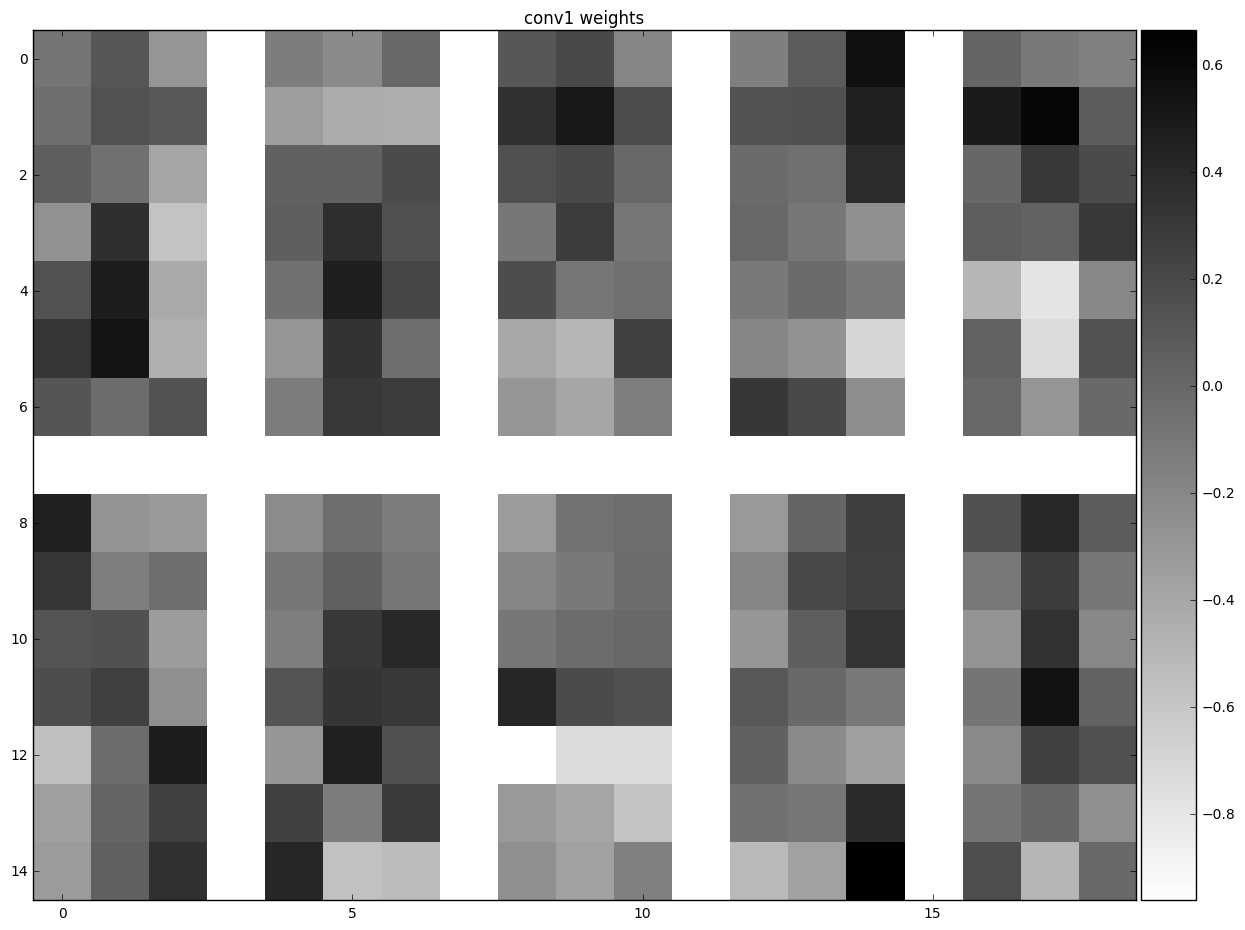

In [25]:
# Visualize weights
W = loaded_model.layers[0].get_weights()[0]
# (7, 3, 1, 10) -> (10, 3, 7)
W = np.squeeze(W).T
# (10, 3, 7) -> (10, 7, 3)
W_filters_transposed = np.empty((W.shape[0], W.shape[2], W.shape[1]))
for i, array in enumerate(W):
    W_filters_transposed[i] = array.T
print(W_filters_transposed.shape)

plt.figure(figsize=(15, 15))
plt.title('conv1 weights')
nice_imshow(plt.gca(), make_mosaic(W_filters_transposed, 2, 5), cmap=cm.binary)
# nice_imshow(plt.gca(), make_mosaic(W_filters_transposed, 4, 4), cmap=cm.binary)